No face found in image: test_dataset/unknown36.jpg
No face found in image: test_dataset/unknown39.jpg


/home/kiratlinux/miniconda3/envs/my_project_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.85
Recall: 0.87
F1 Score: 0.84


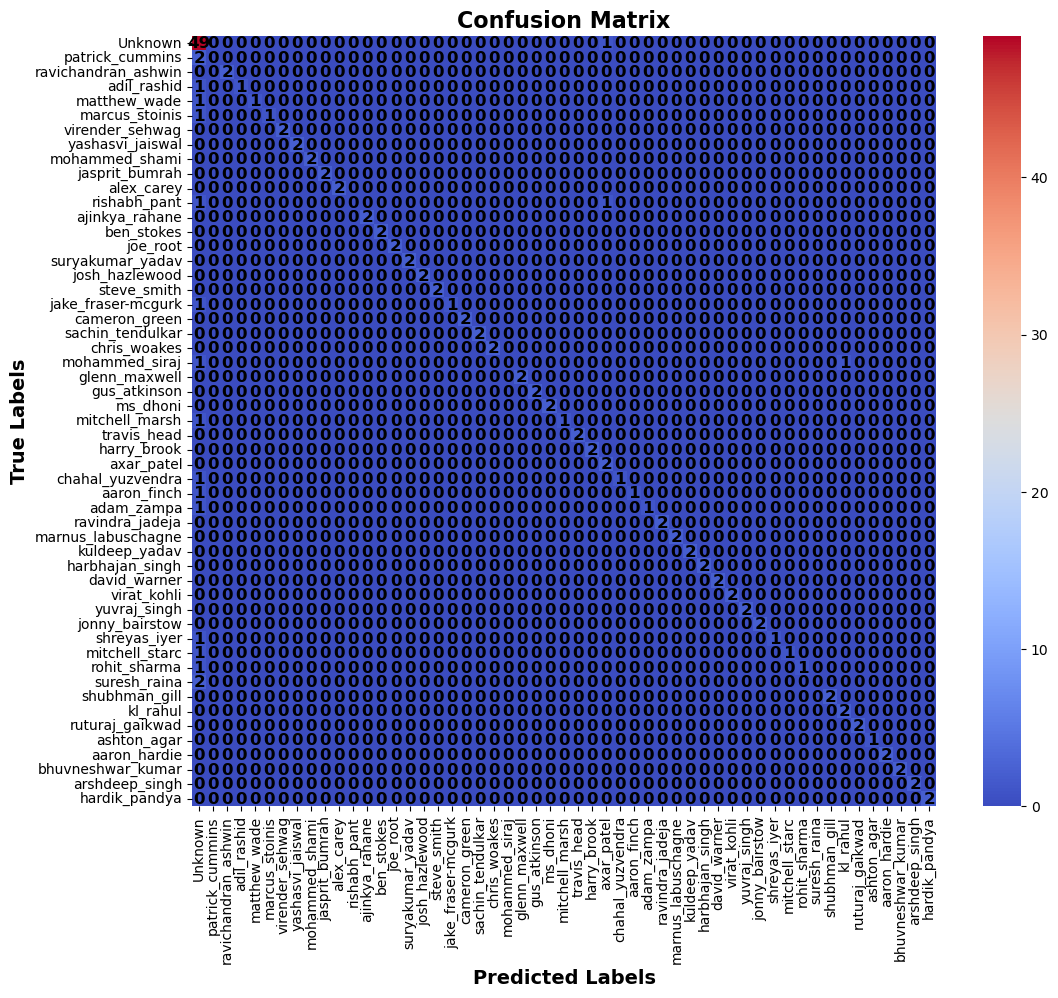

In [ ]:
import cv2
import face_recognition
import pickle
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the face encodings from the pickle file
with open('face_encodings_single_img_test.pkl', 'rb') as f:
    stored_encodings = pickle.load(f)

# Function to compare an image with stored encodings and return matched player name or "Unknown"
def match_face(image_path, stored_encodings, tolerance=0.5):
    # Load the image
    img = cv2.imread(image_path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the face encoding for the image
    face_encodings = face_recognition.face_encodings(rgb_img)
    
    if not face_encodings:
        print(f"No face found in image: {image_path}")
        return "Unknown"  # No face found

    # Use the first detected face encoding
    face_encoding = face_encodings[0]

    # Compare against stored encodings
    for player_name, stored_encoding in stored_encodings.items():
        matches = face_recognition.compare_faces([stored_encoding], face_encoding, tolerance=tolerance)
        if matches[0]:
            return player_name  # Return matched player name

    return "Unknown"  # No match found

# Load the test labels from CSV file
test_labels_df = pd.read_csv('test_labels_full_name.csv')

# Initialize lists to store ground truth labels and predictions
y_true = test_labels_df['true_label'].tolist()  # Ground truth labels from CSV
y_pred = []  # Model predictions

# Iterate through the test images and make predictions
for index, row in test_labels_df.iterrows():
    image_name = row['image_name']
    true_label = row['true_label']
    image_path = f'test_dataset/{image_name}'  # Path to the test image

    # Get the predicted label using match_face function
    predicted_label = match_face(image_path, stored_encodings)
    y_pred.append(predicted_label)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate and display the enhanced confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=test_labels_df['true_label'].unique())
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            annot_kws={"size": 12, "weight": "bold", "color": "black"},
            xticklabels=test_labels_df['true_label'].unique(), 
            yticklabels=test_labels_df['true_label'].unique())

plt.xlabel('Predicted Labels', fontsize=14, weight='bold')
plt.ylabel('True Labels', fontsize=14, weight='bold')
plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.show()
